# Midterm Project (Team #1) Kaylee Auguillard, Andrew Badzioch, Tales Leonidas

1. Team Members: Kaylee Auguillard, Andrew Badzioch, Tales Leonidas
2. Step(s) and the member who completes the step(s).

## Step 1: Introduction 
- Context 
     - In this project, you will make a comparison between Adidas and Nike sneakers products.
- Objectives
     - Data and opinion mining from the dataset and answering mining questions.
- Data Description 
- Dataset: sneakers.csv
    - Product Name: Name of the product
    - Product ID: ID of the product
    - Listing Price: Listed price of the product
    - Sale Price: Sale price of the product
    - Discount: Percentage of discount on the product
    - Brand: Brand of the product
    - Rating: Rating of the product
    - Reviews: Number of reviews for the product


## Step 2: Importing Libraries 
- Import all needed libraries for this project

In [1]:
#general libraries
import numpy as np
import pandas as pd
import math

#data visulaization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#suppressing the warnings
import warnings
warnings.filterwarnings('ignore')

## Step 3: Loading the Dataset

In [2]:
df = pd.read_csv('sneakers.csv')

In [3]:
#make a copy of the dataset
sneakers = df.copy()

In [4]:
#making sure the dataset has been loaded
sneakers.head(10)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,4799,1920,60,Adidas CORE / NEO,1.0,45
6,Women's adidas Sport Inspired Duramo Lite 2.0 ...,CG4051,4799,2399,50,Adidas CORE / NEO,4.4,2
7,Women's adidas Swim Puka Slippers,CM0080,999,599,40,Adidas CORE / NEO,2.8,7
8,WOMEN'S ADIDAS RUNNING DURAMO 9 SHOES,B75990,5599,2799,50,Adidas CORE / NEO,4.5,16
9,Men's adidas Originals Forest Grove Shoes,EE5761,6599,3959,40,Adidas ORIGINALS,4.0,39


# Step 4: EDA

### A) Basic Data Exploration

In [5]:
sneakers.shape

(3268, 8)

In [6]:
sneakers.size

26144

In [7]:
sneakers.ndim

2

In [8]:
sneakers.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [9]:
sneakers.columns

Index(['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount',
       'Brand', 'Rating', 'Reviews'],
      dtype='object')

In [10]:
sneakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


In [11]:
sneakers.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


In [12]:
sneakers.describe(include = 'object')

,Product Name,Product ID,Brand
count,3268,3268,3268
unique,1531,3179,5
top,Women's adidas Originals Sambarose Shoes,CD6720-808,Adidas CORE / NEO
freq,16,3,1111


In [13]:
sneakers.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

In [14]:
# Find and display all duplicated rows in the sneakers dataset
duplicate_rows = sneakers[sneakers.duplicated()].count()
print(duplicate_rows)

Product Name     88
Product ID       88
Listing Price    88
Sale Price       88
Discount         88
Brand            88
Rating           88
Reviews          88
dtype: int64


In [15]:
sneakers.drop_duplicates(inplace=True, ignore_index=True)

In [16]:
sneakers[sneakers.duplicated()].count()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

### B) Univariate, Bivariate, Multivariate Analyses

**Univariate Analysis**

In [17]:
# 6. let's create a new dataset with one variable only: Brand
# then we will check the brands that have the most products listed
top_brands = sneakers['Brand']
top_brands.value_counts().head()

Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Adidas SPORT PERFORMANCE     606
Nike                         555
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

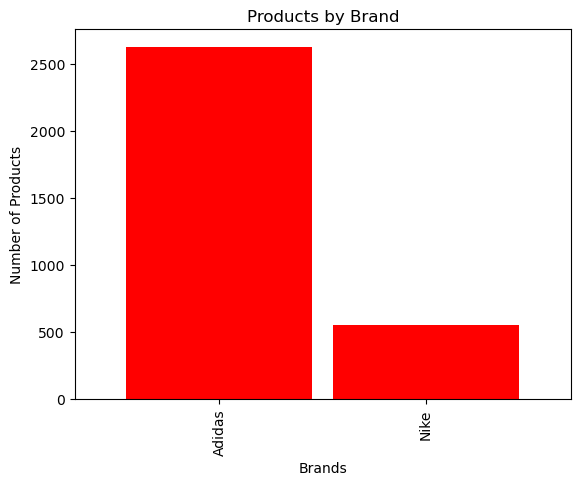

In [18]:
# since Adidas appears in multiple variables, let's combine them into a single one: Adidas
top_brands_merged = top_brands.replace({
    'Adidas CORE / NEO': 'Adidas',
    'Adidas ORIGINALS': 'Adidas',
    'Adidas SPORT PERFORMANCE': 'Adidas',
    'Adidas Adidas ORIGINALS': 'Adidas'
}).value_counts()

# now let's visualize the top brands after merging
top_brands_merged.plot(kind='bar', color='red', width=0.9)

# adding a title and axis labels
plt.title("Products by Brand")
plt.xlabel("Brands")
plt.ylabel("Number of Products");

In [19]:
# checking how many products Adidas has in this dataset
adidas_count = top_brands_merged['Adidas']
print('Adidas has', adidas_count, 'products in this dataset')

Adidas has 2625 products in this dataset


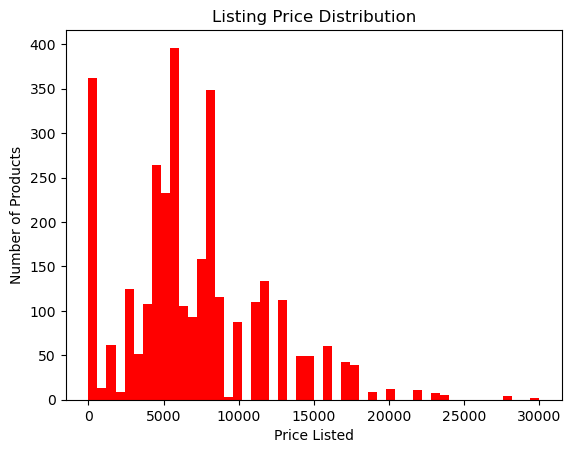

In [20]:
# 7. let's check out the distribution of the variable 'Listing Price'
listing_price = sneakers['Listing Price']
plt.hist(listing_price, bins=50, color='red')

# adding a title and axis labels
plt.title("Listing Price Distribution")
plt.xlabel("Price Listed")
plt.ylabel("Number of Products");

In [21]:
# let's check how many products are listed with a zero value
zero_price = (listing_price == 0).sum()
print(zero_price, 'products have a Listing Price of 0.')

362 products have a Listing Price of 0.


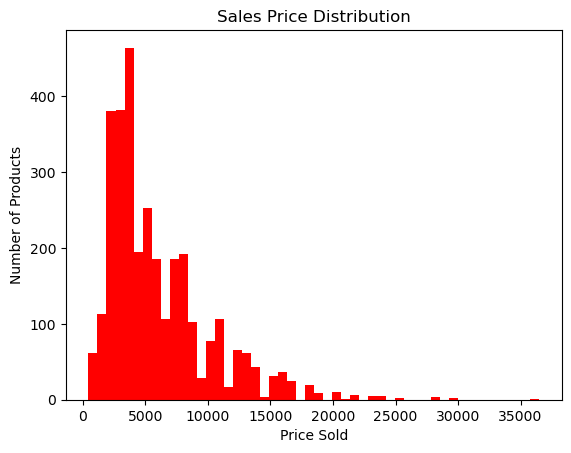

In [22]:
# 8. let's examine the other variables skewness 
sale_price = sneakers['Sale Price']
plt.hist(sale_price, bins=50, color='red')

# adding a title and axis labels
plt.title("Sales Price Distribution")
plt.xlabel("Price Sold")
plt.ylabel("Number of Products");

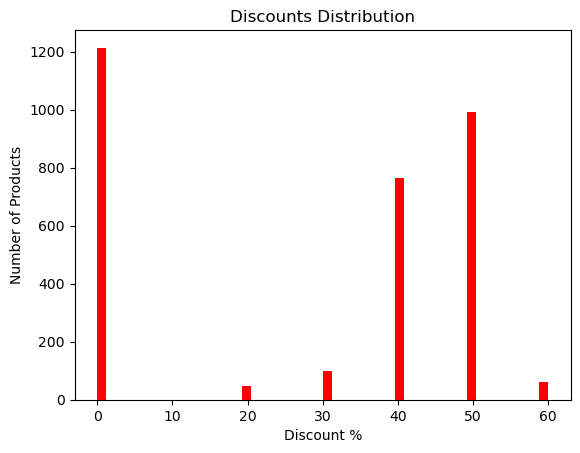

In [23]:
discount = sneakers['Discount']
plt.hist(discount, bins=50, color='red')

# adding a title and axis labels
plt.title("Discounts Distribution")
plt.xlabel("Discount %")
plt.ylabel("Number of Products");

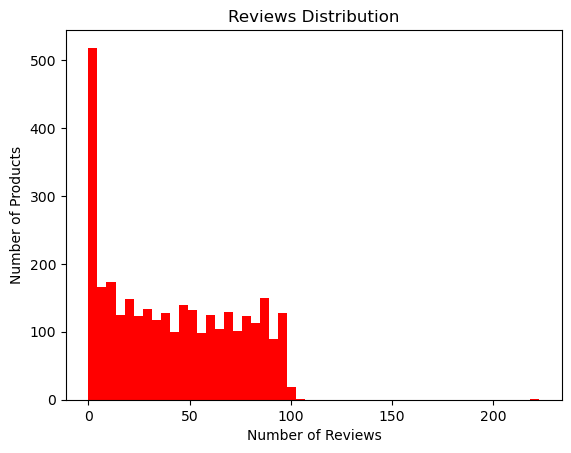

In [24]:
reviews = sneakers['Reviews']
plt.hist(reviews, bins=50, color='red')

# adding a title and axis labels
plt.title("Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Number of Products");

In [25]:
# 9. Take the percentage for the following:

# Products with listing prices less than 15000
total_products = len(sneakers)
listing_price_less_15000 = (sneakers['Listing Price'] < 15000).sum()
percentage_listing_price = (listing_price_less_15000 / total_products) * 100

# Products with sale price less than 15000
sale_price_less_15000 = (sneakers['Sale Price'] < 15000).sum()
percentage_sale_price = (sale_price_less_15000 / total_products) * 100

# Products with at least 50% discount
fifty_percent_discount = ((sneakers['Sale Price'] / sneakers['Listing Price']) <= 0.5).sum()
percentage_discount = (fifty_percent_discount / total_products) * 100

# Products with rating less than 3.5
rating_less_3_5 = (sneakers['Rating'] < 3.5).sum()
percentage_rating = (rating_less_3_5 / total_products) * 100

# Products with review numbers less than 100
reviews_less_100 = (sneakers['Reviews'] < 100).sum()
percentage_reviews = (reviews_less_100 / total_products) * 100

# Top 3 highest percentages of the discount graph
discount_percentage = (1 - (sneakers['Sale Price'] / sneakers['Listing Price'])) * 100
top_3_discounts = discount_percentage.nlargest(3).round(2)

# Print the results
print(f"Percentage of products with listing price less than 15000: {percentage_listing_price:.2f}%")
print(f"Percentage of products with sale price less than 15000: {percentage_sale_price:.2f}%")
print(f"Percentage of products with at least 50% discount: {percentage_discount:.2f}%")
print(f"Percentage of products with rating less than 3.5: {percentage_rating:.2f}%")
print(f"Percentage of products with review numbers less than 100: {percentage_reviews:.2f}%")
print(f"Top 3 highest percentages of discount: {top_3_discounts}")

Percentage of products with listing price less than 15000: 93.93%
Percentage of products with sale price less than 15000: 96.04%
Percentage of products with at least 50% discount: 33.18%
Percentage of products with rating less than 3.5: 47.11%
Percentage of products with review numbers less than 100: 99.94%
Top 3 highest percentages of discount: 674     60.0
782     60.0
2418    60.0
dtype: float64


**Bivariate**

**Multivariate** - Andrew

In [26]:
# finding the dtypes to create the new DataFrame that will be used for the correlation graph and Heatmap
sneakers.dtypes

Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

In [27]:
# creating the new DataFrame using only the numerical dtypes (int64 and float64)
numb_col = sneakers[['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']]
numb_col.head()

,Listing Price,Sale Price,Discount,Rating,Reviews
0,14999,7499,50,4.8,41
1,7599,3799,50,3.3,24
2,999,599,40,2.6,37
3,6999,3499,50,4.1,35
4,7999,3999,50,3.5,72


In [28]:
# this is the correlation graph (showing positive and negative corralation) that will also be used for the Heatmap
numb_col.corr()

,Listing Price,Sale Price,Discount,Rating,Reviews
Listing Price,1.000000,0.365871,0.098878,0.083587,0.137744
Sale Price,0.365871,1.000000,-0.598524,-0.043417,-0.228735
Discount,0.098878,-0.598524,1.000000,0.064803,0.287762
Rating,0.083587,-0.043417,0.064803,1.000000,0.122349
Reviews,0.137744,-0.228735,0.287762,0.122349,1.000000


In [29]:
# create another DataFrame that will be used for below
highest = sneakers[['Product Name', 'Rating', 'Reviews']]
highest.head()

,Product Name,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,4.8,41
1,Women's adidas Originals Sleek Shoes,3.3,24
2,Women's adidas Swim Puka Slippers,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,4.1,35
4,Women's adidas Originals Taekwondo Shoes,3.5,72


In [30]:
# 11. What are the names of the 10 highest rated products?
highest.sort_values(by='Rating', ascending=False).head(10)

,Product Name,Rating,Reviews
1039,Men's adidas Sport Inspired Court Adapt Shoes,5.0,96
2964,Nike React Element 55 Premium,5.0,1
2488,Men's adidas Originals Stan Smith Gore-Tex Shoes,5.0,32
2954,Nike Air Max 720 Waves,5.0,4
2953,Nike Air Zoom Wildhorse 5,5.0,6
1487,Men's adidas Sport Inspired VL Court 2.0 Shoes,5.0,33
2949,Nike Air Streak Lite,5.0,1
221,Men's adidas Running Stargon 1.0 Shoes,5.0,61
595,Men's Running Adispree 5.0 Shoes,5.0,65
2945,Nike Zoom KD12,5.0,1


In [31]:
# 12. What are the 10 products' names with the highest number of reviews?
highest.sort_values(by='Reviews', ascending=False).head(10)

,Product Name,Rating,Reviews
2750,Air Jordan 10 Retro,4.7,223
2804,Nike Zoom Fly,4.3,105
2166,Men's adidas Originals Forest Grove Shoes,4.5,99
723,Women's adidas Sport Inspired Farm Rio Advanta...,4.6,99
667,Men's adidas RUNNING Stardrift Low Shoes,2.9,99
1568,Men's Originals Drop Step Shoes,1.0,99
89,Men's adidas Running Galaxy 4 Shoes,2.4,99
1149,Men's adidas Originals A.R. Trainer Shoes,4.0,99
560,Men's adidas Outdoor Geocach 19 Shoes,2.4,99
1274,Men's Running Nova Flow Shoes,3.1,99


In [32]:
# 13. finding the counts of each discount 
sneakers.groupby(['Brand'])['Discount'].value_counts()

Brand                     Discount
Adidas Adidas ORIGINALS   50            1
Adidas CORE / NEO         50          521
                          40          269
                          0           212
                          20           44
                          30           42
                          60           23
Adidas ORIGINALS          50          298
                          40          291
                          0           282
                          60           20
                          30           16
Adidas SPORT PERFORMANCE  40          203
                          50          174
                          0           165
                          30           41
                          60           18
                          20            5
Nike                      0           555
Name: count, dtype: int64

In [33]:
# 13. (continued from above) to find the total number of items, then subtract the amount of zero discounts, finding the final number of discounts
sneakers.groupby(['Brand'])['Discount'].count()

Brand
Adidas Adidas ORIGINALS        1
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Adidas SPORT PERFORMANCE     606
Nike                         555
Name: Discount, dtype: int64

### C) Visualization
- For this section, you will create graphs including the correlation heatmap and the pairplot.

**Correlation Heatmap** - Andrew

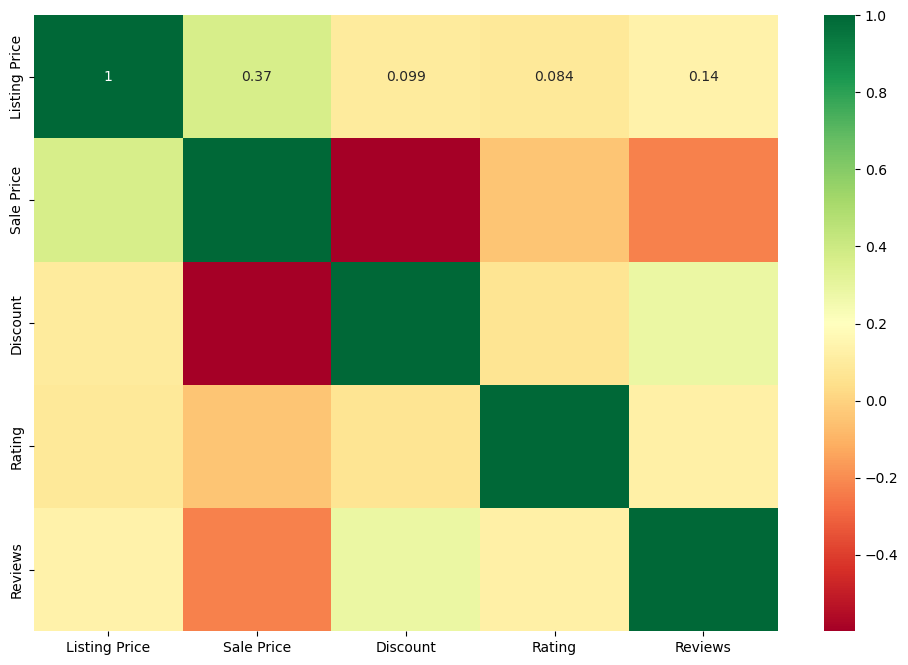

In [34]:
# setting the plot size
plt.figure(figsize=(12, 8))

# creating the heatmap and color coding
sns.heatmap(numb_col.corr(), cmap='RdYlGn', annot=True);

**Pairplot** - Andrew

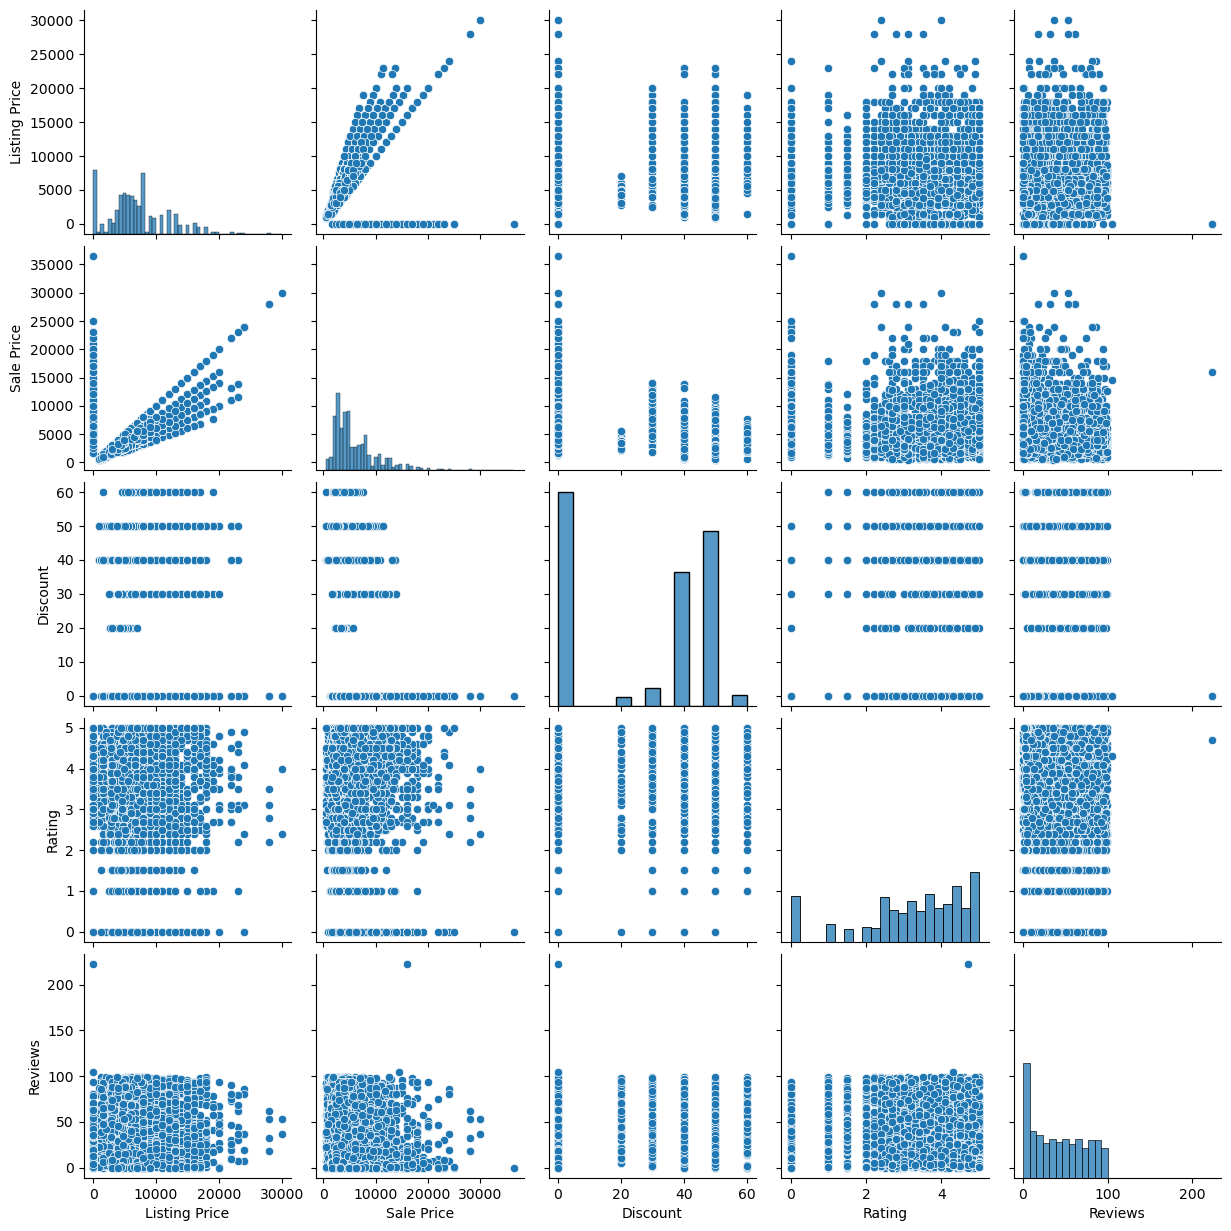

In [35]:
sns.pairplot(numb_col);

### D) EDA Summary

# Step 5: Answering the Mining Questions

- **Answer all questions here (after each question).**

- **Kaylee**
1. What is the shape of the dataset? The Shape of the dataset is (3268, 8).
2. Are there any missing values in this dataset? There are **no** missing values in this dataset.
3. List all 8 columns' dtypes.
     - Product Name -- object
     - Product ID -- object
     - Listing Price -- int64
     - Sale Price -- int64
     - Discount -- int64
     - Brand -- object
     - Rating -- float64
     - Reviews -- int64
4. Are there any duplicated rows (observations) in this dataset? There are 88 rows of duplicates in this dataset.
5. Refer to the statistical summary of the dataset and answer the following:
     - The average listing price: 6868
     - The average sale price: 6134.2
     - The average discount: 22.6
     - The average rating: 3.2
     - The average number of reviews: 40.5

- **Tales**
6. Which "Brand" has the highest number of products in this dataset? Adidas with 2625 products
7. As you can see, the "Listing Price" for some products is zero (0). How many products with zero listing price are there in this dataset?362 products have "Listing Price" of 0.
8. Perform the "Univariate EDA", and examine any type of skewness (outliers) for all the variables.
9. The the percentage for the following:
     - Products with listing prices less than 15000: 93.93%
     - Products with sale price less than 15000:96.04%
     - Products with at least 50% discount:33.18%
     - Products with rating less than 3.5:47.11%
     - Products with review numbers less than 100:99.94%
     - The 3 highest percentages of the discount graph:59.99% (60%).

- **Andrew**
10. Perform the "Bivariate EDA", and examine the following:
     - The two highly positively correlated variables: 
          - 'Sale Price' and 'Listing Price'
     - The two highly negatively correlated variables: 
          - 'Discount' and 'Sale Price'
11. What are the names of the 10 highest rated products?
     1. Men's adidas Sport Inspired Court Adapt Shoes	
     2. Nike React Element 55 Premium	
     3. Men's adidas Originals Stan Smith Gore-Tex Shoes	
     4. Nike Air Max 720 Waves	
     5. Nike Air Zoom Wildhorse 5	
     6. Men's adidas Sport Inspired VL Court 2.0 Shoes	
     7. Nike Air Streak Lite	
     8. Men's adidas Running Stargon 1.0 Shoes	
     9. Men's Running Adispree 5.0 Shoes	
     10. Nike Zoom KD12	
12. What are the 10 products' names with the highest number of reviews?
     1. Air Jordan 10 Retro	
     2. Nike Zoom Fly	
     3. Men's adidas Originals Forest Grove Shoes	
     4. Women's adidas Sport Inspired Farm Rio Advanta...	
     5. Men's adidas RUNNING Stardrift Low Shoes	
     6. Men's Originals Drop Step Shoes	
     7. Men's adidas Running Galaxy 4 Shoes	
     8. Men's adidas Originals A.R. Trainer Shoes	
     9. Men's adidas Outdoor Geocach 19 Shoes	
     10. Men's Running Nova Flow Shoes	
13. Which company gives more discount: Adidas or Nike?
     - Adidas CORE NEO has the most discounts with 899 total

# Step 6: Conclusion 
- For the conclusion, please provide 10 insights gained from completing this project.